# Sampling Validation Notebook
## Notebook Purpose
This notebook is intended to test and validate the functionality of the `samples.py` module during development. It will be used to balance the imbalanced target feature `improved` and involves the following steps:
- Loading sampling configuration from the config file
- Applying undersampling using tomek links
- Applying oversampling using SMOTE-NC
## Objectives
- ✅ Load and review the dataset after sampling
- ✅ Compare feature distributions before and after sampling
- ✅ Ensure sampled data preserves the integrity and distribution of the original variables.
## Notes
- This notebook is part of a larger data science pipeline aimed at exploring the relationship between music preferences and mental health indicators.
- All processing choices will be documented and justified in context.

In [2]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Oversampling
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import TomekLinks

# Statistics
from scipy import stats

from music_and_mental_health_survey_analysis.config import (
    PROCESSED_DATA_DIR, SAMPLING_EVALUATIONS_DIR, RAW_DATA_DIR, INTERIM_DATA_DIR
)
from music_and_mental_health_survey_analysis.utils import (
    load_config_file
)

In [3]:
%load_ext autoreload
%autoreload 2

# Load and Review Dataset

In [4]:
df = pd.read_csv(INTERIM_DATA_DIR / 'sampled.csv')
df.head()

,Age,Hours per day,BPM,While working,Instrumentalist,Composer,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Fav genre_K pop,Fav genre_Latin,Fav genre_Lofi,Fav genre_Metal,Fav genre_Pop,Fav genre_R&B,Fav genre_Rap,Fav genre_Rock,Fav genre_Video game music,improved
0,18.0,3.0,156.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,63.0,1.5,119.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,18.0,4.0,132.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,61.0,2.5,84.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,18.0,4.0,107.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [5]:
pre_sampling_df = pd.read_csv(PROCESSED_DATA_DIR / 'features.csv')

In [6]:
print(f"Missing values: {any(df.isna().sum() > 0)}")

Missing values: False


In [7]:
print(f"Pre sampling shape: {pre_sampling_df.shape}")
print(f"Post sampling shape: {df.shape}")

Pre sampling shape: (715, 49)
Post sampling shape: (966, 51)


In [8]:
df.describe()

,Age,Hours per day,BPM,While working,Instrumentalist,Composer,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Fav genre_K pop,Fav genre_Latin,Fav genre_Lofi,Fav genre_Metal,Fav genre_Pop,Fav genre_R&B,Fav genre_Rap,Fav genre_Rock,Fav genre_Video game music,improved
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,...,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000
mean,25.091829,3.445360,123.193297,0.787785,0.245342,0.122153,0.690476,0.569358,1.267081,0.662526,...,0.025880,0.003106,0.009317,0.100414,0.126294,0.032091,0.020704,0.286749,0.039337,0.500000
std,10.996894,2.588245,28.719640,0.409088,0.430512,0.327632,0.462537,0.495423,0.981219,0.843127,...,0.158859,0.055670,0.096122,0.300707,0.332352,0.176333,0.142465,0.452478,0.194497,0.500259
min,10.000000,0.100000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,1.961724,104.953146,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.772450,3.000000,120.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,27.385848,4.424335,140.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,80.000000,16.000000,210.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Check for duplicate columns

print(f"Duplicated columns: {', '.join(df.columns[df.columns.duplicated()])}")

Duplicated columns: 


In [10]:
# Check if any columns non-numeric

df.select_dtypes(exclude='number').columns

Index([], dtype='object')

# Compare Feature Distributions

## Continuous Features

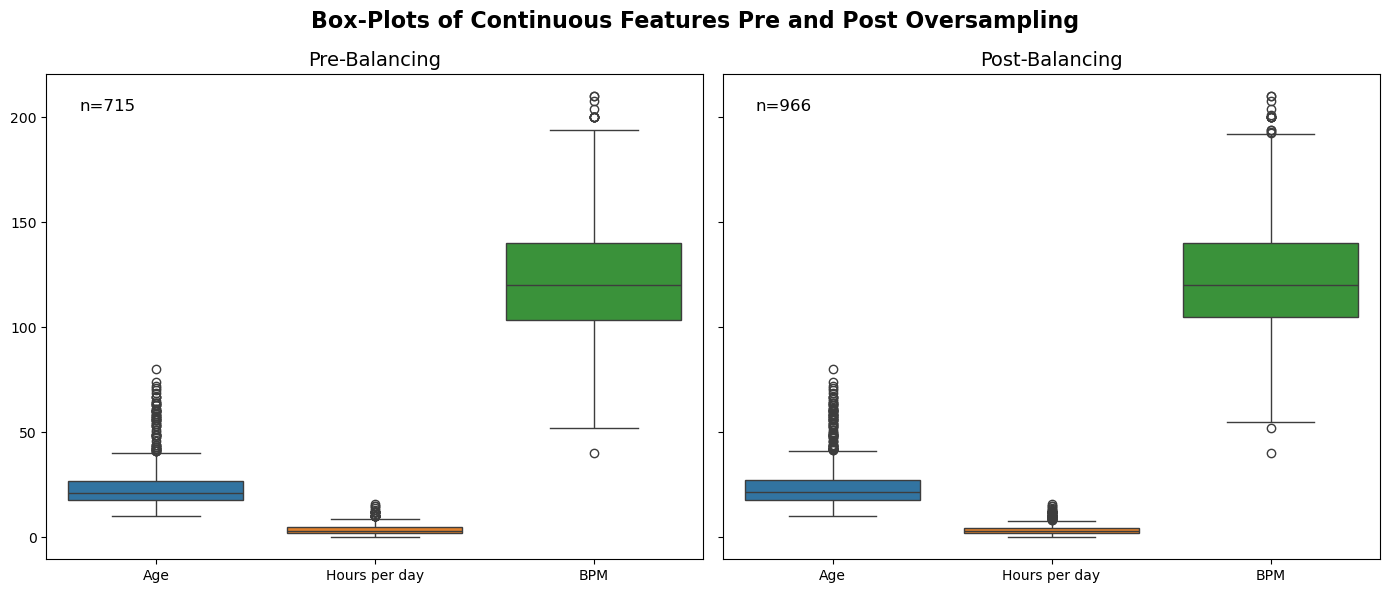

In [11]:
# Plot continuous feature boxplots pre and post imputation

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14, 6))

continuous_features = ['Age', 'Hours per day', 'BPM']

fig.suptitle('Box-Plots of Continuous Features Pre and Post Oversampling', fontsize=16, fontweight='bold')

sns.boxplot(pre_sampling_df[continuous_features], ax=ax[0])
ax[0].set_title('Pre-Balancing', fontsize=14)
ax[0].text(0.05, 0.95, f"n={len(pre_sampling_df)}", transform=ax[0].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

sns.boxplot(df[continuous_features], ax=ax[1])
ax[1].set_title('Post-Balancing', fontsize=14)
ax[1].text(0.05, 0.95, f"n={len(df)}", transform=ax[1].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

plt.tight_layout()
plt.savefig(SAMPLING_EVALUATIONS_DIR / 'pre_post_balancing_continuous.png', dpi=300, bbox_inches='tight')
plt.show()

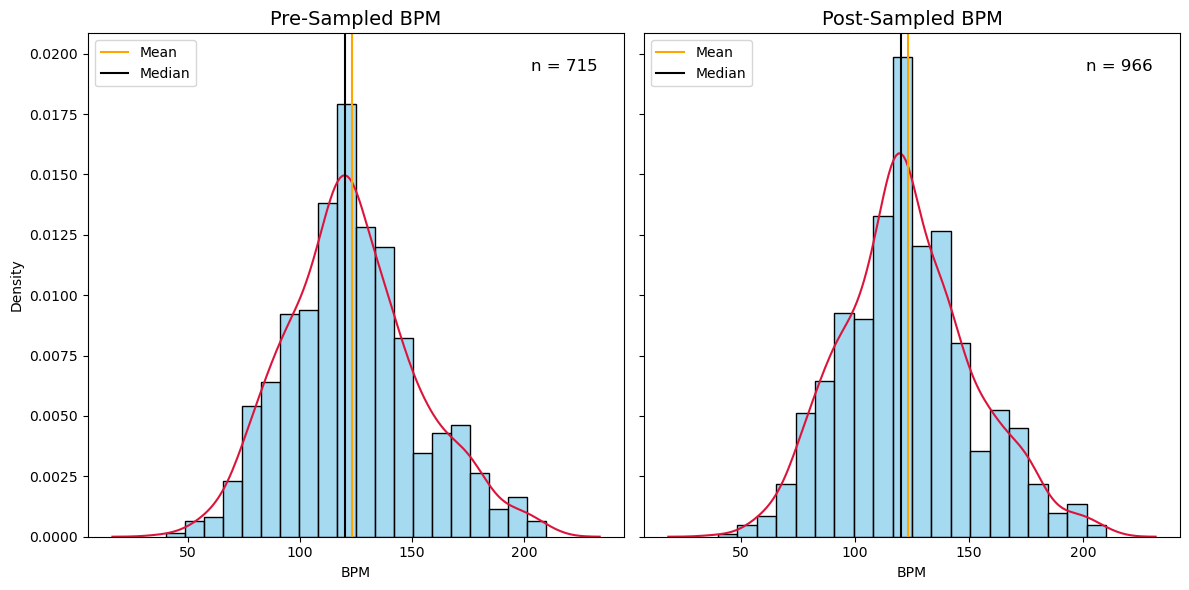

In [12]:
# Plot distributions of BPM pre and post imputation

pre_sampling_mean = np.mean(pre_sampling_df['BPM'])
pre_sampling_median = np.median(pre_sampling_df['BPM'])
post_sampling_mean = np.mean(df['BPM'])
post_sampling_median = np.median(df['BPM'])

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))

axes = ax.flatten()

axes[0].set_title('Pre-Sampled BPM', fontsize=14)
sns.histplot(pre_sampling_df['BPM'], stat='density', ax=axes[0], color='skyblue', bins=20)
sns.kdeplot(pre_sampling_df['BPM'], ax=axes[0], color='crimson')
axes[0].axvline(pre_sampling_mean, color='orange', label='Mean')
axes[0].axvline(pre_sampling_median, color='black', label='Median')
axes[0].legend()
axes[0].text(0.95, 0.95, f'n = {len(pre_sampling_df)}', transform=axes[0].transAxes,
           fontsize=12, verticalalignment='top', horizontalalignment='right')

axes[1].set_title('Post-Sampled BPM', fontsize=14)
sns.histplot(df['BPM'], stat='density', color='skyblue', bins=20, ax=axes[1])
sns.kdeplot(df['BPM'], color='crimson', ax=axes[1])
axes[1].axvline(post_sampling_mean, color='orange', label='Mean')
axes[1].axvline(post_sampling_median, color='black', label='Median')
axes[1].legend()
axes[1].text(0.95, 0.95, f'n = {len(df)}', transform=axes[1].transAxes,
           fontsize=12, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig(SAMPLING_EVALUATIONS_DIR / 'pre_post_oversample_bpm.png', dpi=300, bbox_inches='tight')
plt.show()

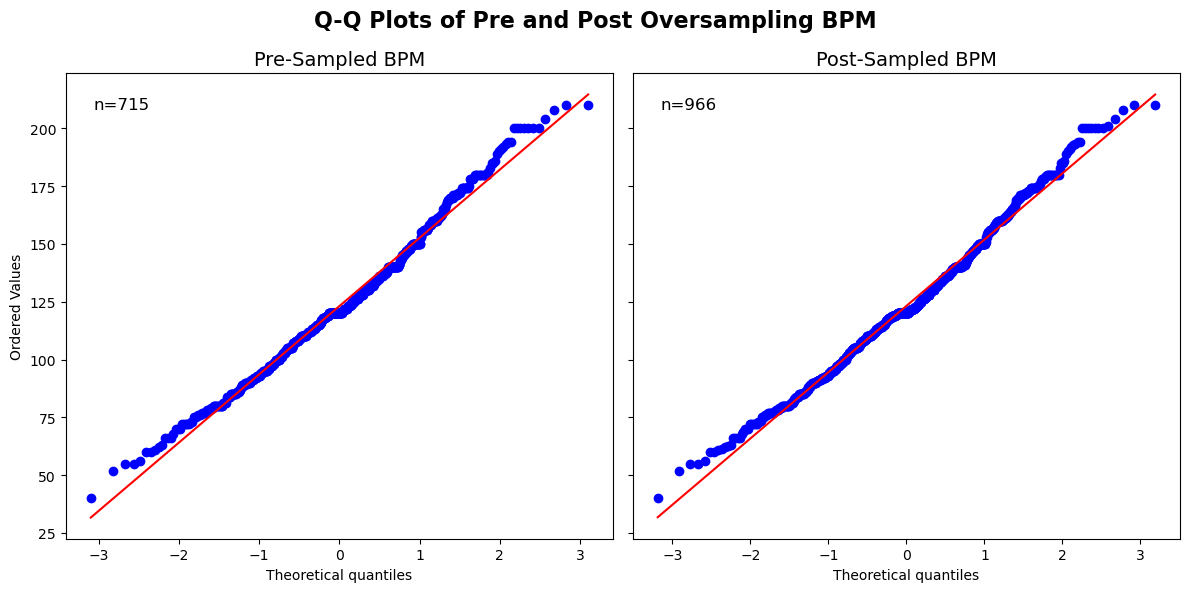

In [13]:
# Plot qq plots to verify normality

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

axes = ax.flatten()

fig.suptitle('Q-Q Plots of Pre and Post Oversampling BPM', fontsize=16, fontweight='bold')

plt.sca(axes[0])
stats.probplot(pre_sampling_df['BPM'], dist='norm', plot=plt)
axes[0].set_title('Pre-Sampled BPM', fontsize=14)
axes[0].text(0.05, 0.95, s=f"n={len(pre_sampling_df)}", transform=axes[0].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

plt.sca(axes[1])
stats.probplot(df['BPM'], dist='norm', plot=plt)
axes[1].set_title('Post-Sampled BPM', fontsize=14)
axes[1].set_ylabel('')
axes[1].text(0.05, 0.95, s=f"n={len(df)}", transform=axes[1].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

plt.tight_layout()
plt.savefig(SAMPLING_EVALUATIONS_DIR / 'qq_pre_post_oversampling_bpm.png', dpi=300, bbox_inches='tight')
plt.show()

##### Summary
- The distribution of `BPM` pre and post oversampling remains identical aside for a **higher central tendency**.
- `BPM` remains **normally distributed** post oversampling.

## Categorical Features

### Frequency

In [14]:
freq_cols = [col for col in df.columns if col.startswith('Frequency ')]

df[freq_cols]

,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music]
0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,3.0,1.0,0.0,3.0,2.0,3.0,0.0,2.0
1,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,3.0,1.0
2,0.0,0.0,3.0,0.0,0.0,1.0,1.0,3.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,3.0
3,2.0,0.0,0.0,1.0,2.0,0.0,3.0,2.0,3.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,2.0,3.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0
962,1.0,1.0,0.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,2.0
963,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,0.0
964,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,3.0,0.0


In [15]:
# Unpivot data for plotting

melted_df = pre_sampling_df[freq_cols].melt(var_name='Genre', value_name='Frequency')
melted_resampled_df = df[freq_cols].melt(var_name='Genre', value_name='Frequency')
melted_df['Genre'] = melted_df['Genre'].str.strip('Frequency ').str.slice(1, -1)
melted_resampled_df['Genre'] = melted_resampled_df['Genre'].str.strip('Frequency ').str.slice(1, -1)

In [16]:
# Combine into one df

melted_df['Source'] = 'Pre-Sampling'
melted_resampled_df['Source'] = 'Post-Sampling'

combined_df = pd.concat([melted_df, melted_resampled_df])

<Figure size 1200x600 with 0 Axes>

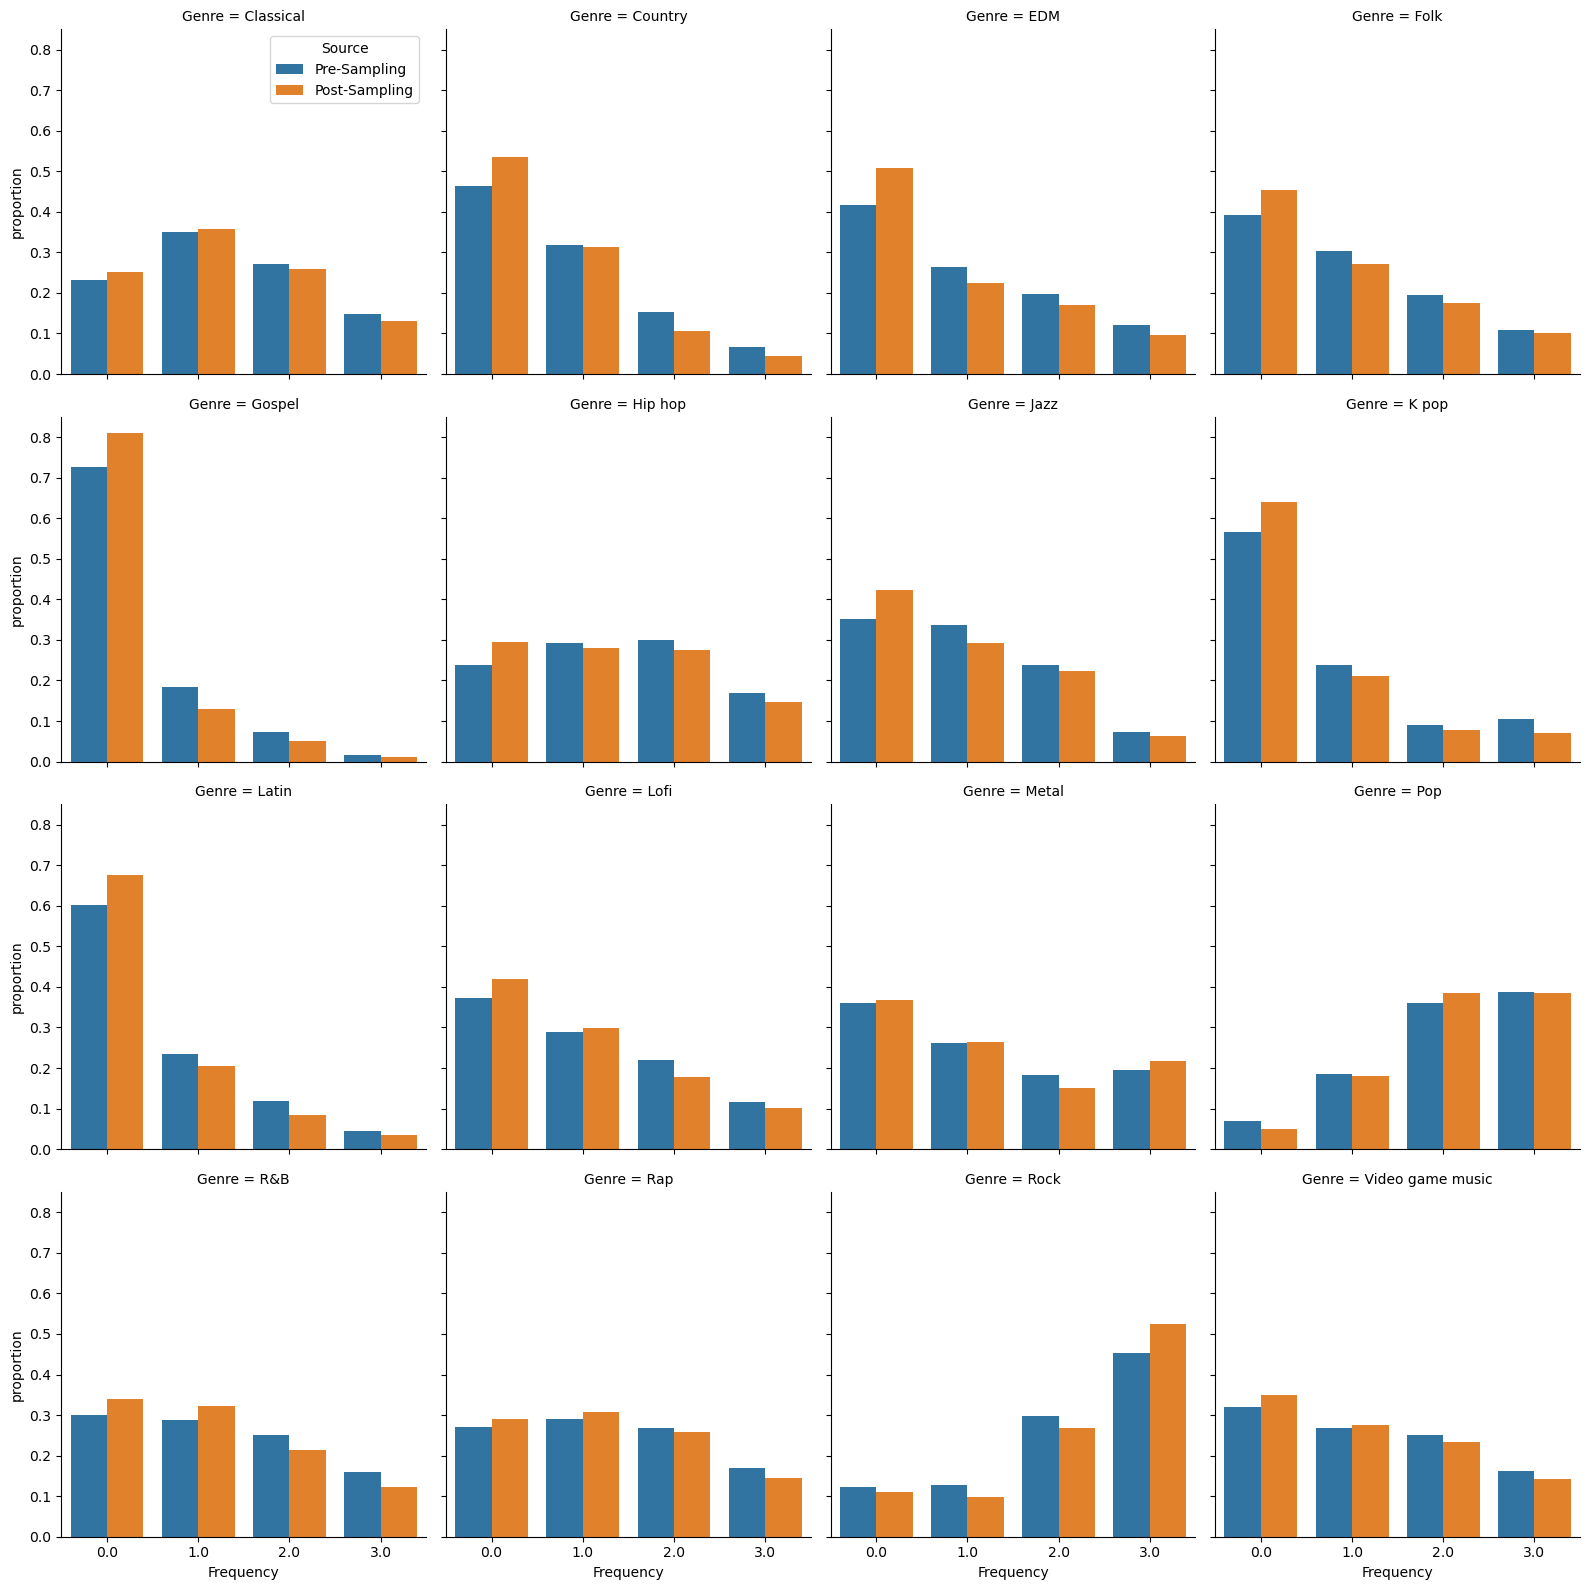

In [17]:
# Plot proportions from both datasets for comparison
grouped_combined = combined_df.groupby(by=['Source', 'Genre']).value_counts(normalize=True).reset_index()

plt.figure(figsize=(12, 6))

sns.catplot(
    data=grouped_combined,
    x='Frequency',
    y='proportion',
    kind='bar',
    col='Genre',
    col_wrap=4,
    hue='Source',
    hue_order=['Pre-Sampling', 'Post-Sampling'],
    height=4,
    dodge=True,
    legend_out=False
)

plt.tight_layout()
plt.savefig(SAMPLING_EVALUATIONS_DIR / 'bar_pre_post_sampling.png', dpi=300, bbox_inches='tight')
plt.show()

### Illness

In [18]:
# Prepare data for plotting in long form

illness_cols = ['Anxiety', 'OCD', 'Depression', 'Insomnia']

melted_df = pre_sampling_df[illness_cols].melt(var_name='Illness', value_name='Rank')
melted_resampled_df = df[illness_cols].melt(var_name='Illness', value_name='Rank')
melted_df['Source'] = 'Pre-Sampling'
melted_resampled_df['Source'] = 'Post-Sampling'

# Combine into one dataframe
combined_df = pd.concat([melted_df, melted_resampled_df])

# Convert rank to string since ordinal not continuous
combined_df['Rank'] = combined_df['Rank'].astype(int).astype(str)

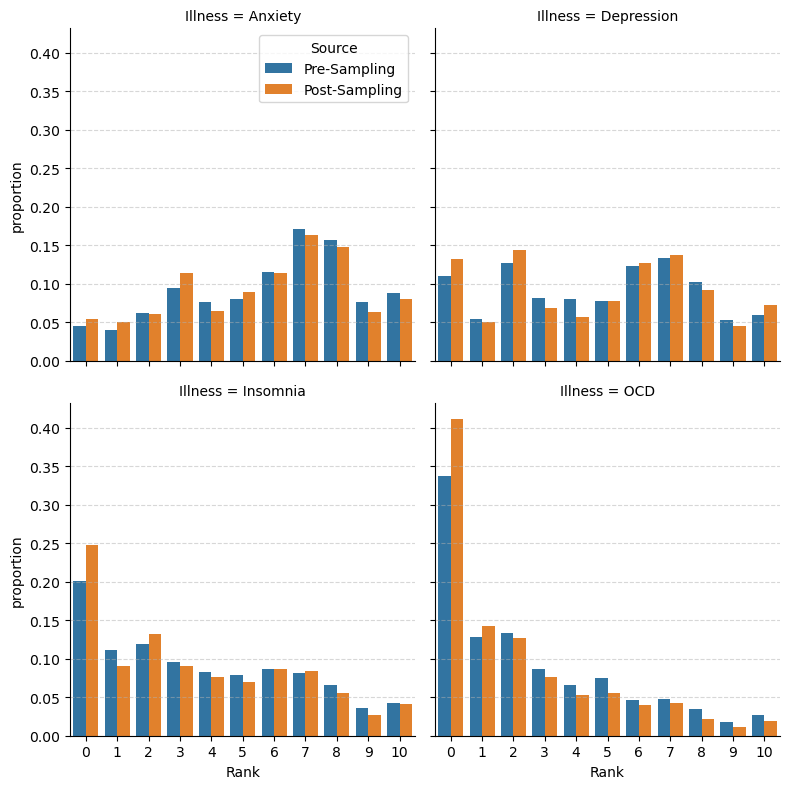

In [19]:
# Plot illness data pre and post imputation for comparison
grouped_combined = combined_df.groupby(by=['Illness', 'Source']).value_counts(normalize=True).reset_index()

plot = sns.catplot(
    data=grouped_combined,
    x='Rank',
    y='proportion',
    col='Illness',
    col_wrap=2,
    kind='bar',
    hue='Source',
    hue_order=['Pre-Sampling', 'Post-Sampling'],
    order=list(range(11)),
    height=4,
    legend_out=False,
)

for ax in plot.axes:
    ax.grid(axis='y', alpha=0.5, linestyle='--')

plt.tight_layout()
plt.savefig(SAMPLING_EVALUATIONS_DIR / 'illness_pre_post_sampling.png', dpi=300, bbox_inches='tight')
plt.show()

##### Summary
- Genre frequency distributions were **notably altered** after SMOTE-NC oversampling.
  - For example, the proportion of respondents who never listened to EDM **increased** from approximately 40% to over 60%, while the proportions of other frequency categories declined.
- In the majority of categorical features, SMOTE-NC smoothed the distribution, reducing the presence of extreme or sparse categories.
- Certain categorical values experienced disproportionate increases, which may introduce bias or affect model interpretability:
- The proportion of participants with a `Depression` score of 10 **increased** from 5% to 25%.
- The proportion with an `Anxiety` score of 7 **increased** from ~17% to ~27%.